In [1]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('powerlifting.csv')

# convert column names to lowercase 
df.columns = [col.lower() for col in df.columns]

In [3]:
df.head()

,meetid,name,sex,equipment,age,division,bodyweightkg,weightclasskg,squat4kg,bestsquatkg,bench4kg,bestbenchkg,deadlift4kg,bestdeadliftkg,totalkg,place,wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [4]:
# for this analysis we'll only be looking at unequipped male lifters
raw = df.loc[df['equipment']=='Raw']
raw_m = raw.loc[df['sex']=='M']

raw_m.head()

,meetid,name,sex,equipment,age,division,bodyweightkg,weightclasskg,squat4kg,bestsquatkg,bench4kg,bestbenchkg,deadlift4kg,bestdeadliftkg,totalkg,place,wilks
23,0,Kevin Gingerich,M,Raw,32.0,Open Junior,71.94,75,NaN,154.22,NaN,115.67,NaN,183.70,453.59,2,333.01
24,0,Juan Bollo,M,Raw,20.0,Open Junior,70.67,75,NaN,163.29,NaN,111.13,NaN,204.12,478.54,1,356.03
26,0,James McManus,M,Raw,36.0,Open Junior,74.93,75,NaN,NaN,NaN,115.67,NaN,156.49,272.16,1,194.06
28,0,Justin Monk,M,Raw,22.0,Open Junior,79.65,82.5,NaN,161.03,NaN,127.01,NaN,197.31,485.35,2,332.27
29,0,Kevin Londe,M,Raw,23.0,Open Junior,80.10,82.5,NaN,190.51,NaN,120.20,NaN,231.33,542.04,1,369.76


In [5]:
# take a look at missing values for our refined dataset
raw_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128650 entries, 23 to 385652
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   meetid          128650 non-null  int64  
 1   name            128650 non-null  object 
 2   sex             128650 non-null  object 
 3   equipment       128650 non-null  object 
 4   age             67546 non-null   float64
 5   division        122712 non-null  object 
 6   bodyweightkg    128433 non-null  float64
 7   weightclasskg   128031 non-null  object 
 8   squat4kg        236 non-null     float64
 9   bestsquatkg     90140 non-null   float64
 10  bench4kg        809 non-null     float64
 11  bestbenchkg     118713 non-null  float64
 12  deadlift4kg     838 non-null     float64
 13  bestdeadliftkg  104081 non-null  float64
 14  totalkg         123934 non-null  float64
 15  place           128067 non-null  object 
 16  wilks           123755 non-null  float64
dtypes: float6

In [6]:
# drop all rows missing totalkg data
raw_m = raw_m[raw_m['totalkg'].notna()]
# drop all rows missing bodyweightkg data
raw_m = raw_m[raw_m['bodyweightkg'].notna()]
# drop all rows missing bestdeadliftkg data
raw_m = raw_m[raw_m['bestdeadliftkg'].notna()]

In [7]:
# drop the columns that aren't adding much information
drops = ['meetid', 'name', 'squat4kg', 'bench4kg', 'deadlift4kg', 'place']
raw_m = raw_m.drop(drops, 1)
raw_m = raw_m.reset_index()

In [8]:
raw_m.head()

,index,sex,equipment,age,division,bodyweightkg,weightclasskg,bestsquatkg,bestbenchkg,bestdeadliftkg,totalkg,wilks
0,23,M,Raw,32.0,Open Junior,71.94,75,154.22,115.67,183.70,453.59,333.01
1,24,M,Raw,20.0,Open Junior,70.67,75,163.29,111.13,204.12,478.54,356.03
2,26,M,Raw,36.0,Open Junior,74.93,75,NaN,115.67,156.49,272.16,194.06
3,28,M,Raw,22.0,Open Junior,79.65,82.5,161.03,127.01,197.31,485.35,332.27
4,29,M,Raw,23.0,Open Junior,80.10,82.5,190.51,120.20,231.33,542.04,369.76


In [9]:
raw_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101963 entries, 0 to 101962
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           101963 non-null  int64  
 1   sex             101963 non-null  object 
 2   equipment       101963 non-null  object 
 3   age             53341 non-null   float64
 4   division        96881 non-null   object 
 5   bodyweightkg    101963 non-null  float64
 6   weightclasskg   101606 non-null  object 
 7   bestsquatkg     87450 non-null   float64
 8   bestbenchkg     94808 non-null   float64
 9   bestdeadliftkg  101963 non-null  float64
 10  totalkg         101963 non-null  float64
 11  wilks           101963 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 9.3+ MB


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='bodyweightkg', ylabel='totalkg'>

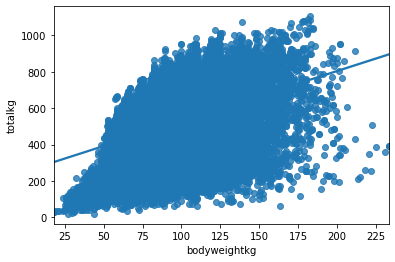

In [11]:
sns.regplot(data=raw_m, x='bodyweightkg', y='totalkg')

<AxesSubplot:xlabel='bestdeadliftkg', ylabel='totalkg'>

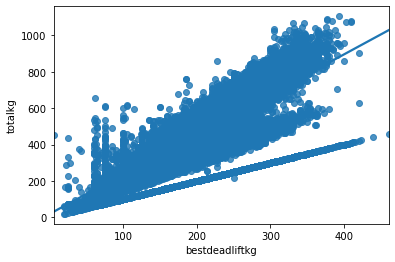

In [12]:
sns.regplot(data=raw_m, x='bestdeadliftkg', y='totalkg')

<AxesSubplot:xlabel='totalkg', ylabel='Count'>

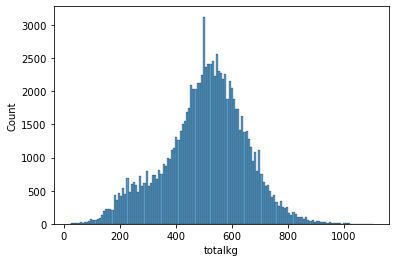

In [13]:
# quick check of distribution for target variable
sns.histplot(raw_m, x='totalkg')

In [14]:
# import linear regression dependencies
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [15]:
# separate dependent and independent variables and reshape for model
x = np.array(raw_m['bodyweightkg']).reshape(-1, 1)
y = np.array(raw_m['totalkg']).reshape(-1, 1)

# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# initialize model
linear = LinearRegression()
linear.fit(x_train, y_train)

# get predictions
y_pred = linear.predict(x_test)

# predicting the accuracy score
score = r2_score(y_test,y_pred)
score

0.1444383749687067

In [16]:
# run linear regression with bestdeadliftkg as sole predictor

x = np.array(raw_m['bestdeadliftkg']).reshape(-1, 1)
y = np.array(raw_m['totalkg']).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

linear = LinearRegression()
linear.fit(x_train, y_train)

y_pred = linear.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.4994174842449608

In [19]:
raw_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101963 entries, 0 to 101962
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           101963 non-null  int64  
 1   sex             101963 non-null  object 
 2   equipment       101963 non-null  object 
 3   age             53341 non-null   float64
 4   division        96881 non-null   object 
 5   bodyweightkg    101963 non-null  float64
 6   weightclasskg   101606 non-null  object 
 7   bestsquatkg     87450 non-null   float64
 8   bestbenchkg     94808 non-null   float64
 9   bestdeadliftkg  101963 non-null  float64
 10  totalkg         101963 non-null  float64
 11  wilks           101963 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 9.3+ MB


In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# convert our object classes to int to be readable by our model
raw_m['weightclasskg'] = le.fit_transform(raw_m['weightclasskg'].values)
raw_m['division'] = le.fit_transform(raw_m['division'].values)

In [35]:
# create model using more variables, including wilks score
# remove rows with missing data
raw_m = raw_m.dropna()
# separate dependent and independent variables
x = raw_m[['bodyweightkg', 'weightclasskg', 'division', 'age', 'wilks']]
y = raw_m['totalkg']

# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# initialize model
linear_wilks = LinearRegression()
linear_wilks.fit(x_train, y_train)

#score
y_pred = linear_wilks.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.9655079786495907

In [25]:
# Print division and weightclass values and labels to use for my own prediction
for i in raw_m['division'].unique():
    print(i, le.inverse_transform([i]))

1013 ['Open Junior']
997 ['Mst 40-44']
1024 ['Open Senior']
999 ['Mst 55-59']
1348 ['T3']
1007 ['Open']
1001 ['Novice']
702 ['MPF']
540 ['M-NFR-X']
558 ['M-OFR-T']
520 ['M-M5FR-X']
640 ['M-T2FR-X']
559 ['M-OFR-U']
535 ['M-MPFFR-X']
1343 ['T1']
664 ['M4']
1342 ['T-3']
655 ['M/P/F']
408 ['M-1']
417 ['M-4']
414 ['M-2']
656 ['M1']
1349 ['T3-Teen']
1347 ['T2-Teen']
657 ['M1-MST']
668 ['M5-MST']
665 ['M4-MST']
663 ['M3-MST']
539 ['M-NF-R-X']
556 ['M-OF-R-T']
644 ['M-T3F-R-X']
557 ['M-OF-R-U']
534 ['M-MPFF-R-X']
485 ['M-M1F-R-X']
498 ['M-M2F-R-X']
508 ['M-M3F-R-X']
1344 ['T1-Teen']
1245 ['RM 45-49']
1263 ['RY 8-9']
1340 ['T 18-19']
1256 ['RT 12-13']
1239 ['RLM 55-59']
1247 ['RM 55-59']
389 ['LAW/MIL 65-69']
1249 ['RM 65-69']
1115 ['R Open']
1116 ['R SUB']
1251 ['RM 75-79']
1257 ['RT 14-15']
1250 ['RM 70-74']
288 ['DISABLED 40-44']
1110 ['R LAW/MIL 40-44']
1242 ['RLM 70-74']
391 ['LM 50-54']
1259 ['RT 18-19']
1241 ['RLM 65-69']
1236 ['RLM 40-44']
1237 ['RLM 45-49']
398 ['M 40-44']
1238 ['RLM 5

683 ['ML']
667 ['M5']
670 ['M6']
318 ['Guest']
444 ['M-CL']
532 ['M-MIL']
487 ['M-M1a']
501 ['M-M2a']
518 ['M-M4b']
502 ['M-M2b']
488 ['M-M1b']
510 ['M-M3a']
517 ['M-M4a']
511 ['M-M3b']
416 ['M-3a']
315 ['Frosh/Soph']
382 ['Junior/Senior']
316 ['Frosh/Soph Junior Varsity']
336 ['JR/SR Varsity']
361 ['Junior 16-17']
376 ['Junior Men 13-15']
911 ['Master Men-70-74']
906 ['Master Men-45-49']
892 ['Master Men 60-64']
905 ['Master Men-40-44']
907 ['Master Men-50-54']
888 ['Master Men 50-54']
886 ['Master Men 45-49']
351 ['Jr Men 20-23']
1328 ['Submaster Men']
375 ['Junior Men']
688 ['MM2']
731 ['MSM']
681 ['MJ']
740 ['MT3']
735 ['MT1']
334 ['JR Men 20-23']
903 ['Master Men M65+']
332 ['JR Men 15-19']
899 ['Master Men M40+']
901 ['Master Men M50+']
902 ['Master Men M60+']
904 ['Master Men M70+']
1364 ['Teen Men 15-19']
893 ['Master Men 65+']
883 ['Master Men 40+']
887 ['Master Men 50+']
891 ['Master Men 60+']
331 ['JR Men 13-15']
889 ['Master Men 55+']
900 ['Master Men M45+']
885 ['Master Me

In [26]:
for i in raw_m['weightclasskg'].unique():
    print(i, le.inverse_transform([i]))

31 ['50-54R']
33 ['55-59']
38 ['60-64R']
0 ['11-12R']
8 ['166-181']
11 ['17-19 R']
28 ['45-49R']
3 ['13-14R']
10 ['17-18']
22 ['40-44']
15 ['20-23']
9 ['166-182']
25 ['40-49']
41 ['70-74']
27 ['45-49 R']
2 ['12-13']
40 ['65-69R']
6 ['149-165']
7 ['16-17']
30 ['50-54 R']
34 ['55-59 R']
24 ['40-44R']
21 ['35-39']
35 ['55-59R']
20 ['30-34']
23 ['40-44 R']
36 ['60-64']
19 ['276-308']
4 ['13-15']
5 ['14-15']
1 ['12*13']
18 ['243-275']
14 ['199-220']
17 ['221-242']
26 ['45-49']
39 ['65-69']


In [39]:
# predict my total
pred = np.array([70.3, 165.56, 994, 13, 238]).reshape(1, -1)
my_total = linear_wilks.predict(pred)

# convert to lbs
my_total = my_total[0] * 2.2
my_total

686.8548653636235

In [42]:
# create model without using wilks score

# separate dependent and independent variables
x = raw_m[['bodyweightkg', 'weightclasskg', 'division', 'age']]
y = raw_m['totalkg']

# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# initialize model
linear_no_wilks = LinearRegression()
linear_no_wilks.fit(x_train, y_train)

#score
y_pred = linear_no_wilks.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.3495504491870437

In [43]:
# predict my total 
pred = np.array([70.3, 165.56, 994, 13]).reshape(1, -1)
my_total = linear_no_wilks.predict(pred)

# convert to lbs
my_total = my_total[0] * 2.2
my_total

1164.1579894910296